In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [313]:
df = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [314]:
df.shape

(2938, 22)

In [315]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [316]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [317]:
df.select_dtypes(include=['int', 'float'])

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [318]:
for cols in df.columns:
    if df[cols].dtypes in ['int', 'float']:
        selected_cols = df[cols]
        cols_mean = selected_cols.mean()
        df[cols].fillna(cols_mean, inplace=True)

In [319]:
df.isnull

<bound method DataFrame.isnull of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

In [320]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [321]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [322]:
for i in enumerate(df.columns):
    print(i, df[i[1]].value_counts())
    print('\n')

(0, 'Country') Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64


(1, 'Year') Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64


(2, 'Status') Status
Developing    2426
Developed      512
Name: count, dtype: int64


(3, 'Life expectancy ') Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 363, dtype: int64


(4, 'Adult Mortality') Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
  

In [323]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#EDA

<Axes: xlabel='Year', ylabel='count'>

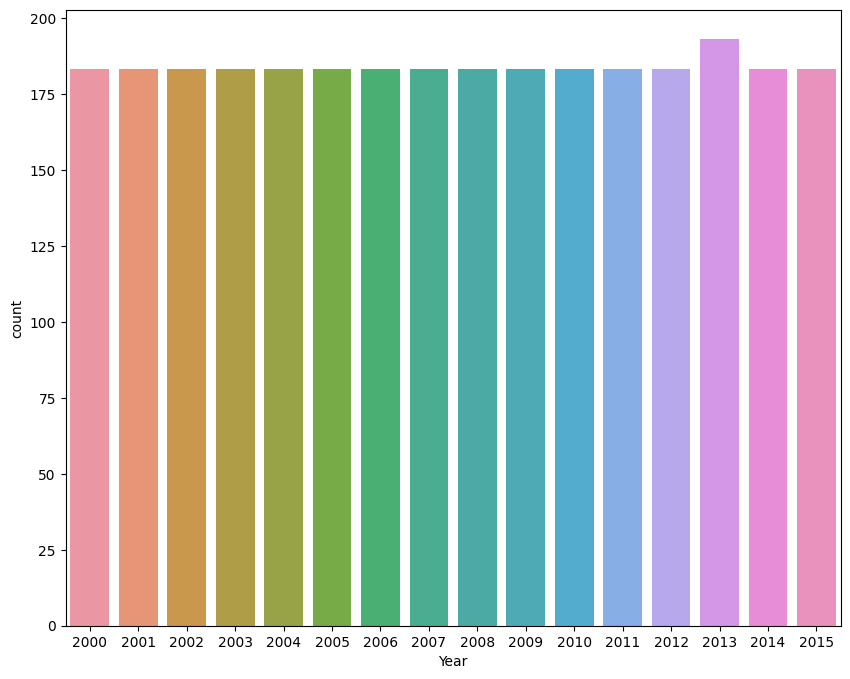

In [324]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Year')

### We can make an inference here that maximum of the data of the countries is for 2013

<Axes: xlabel='Status', ylabel='count'>

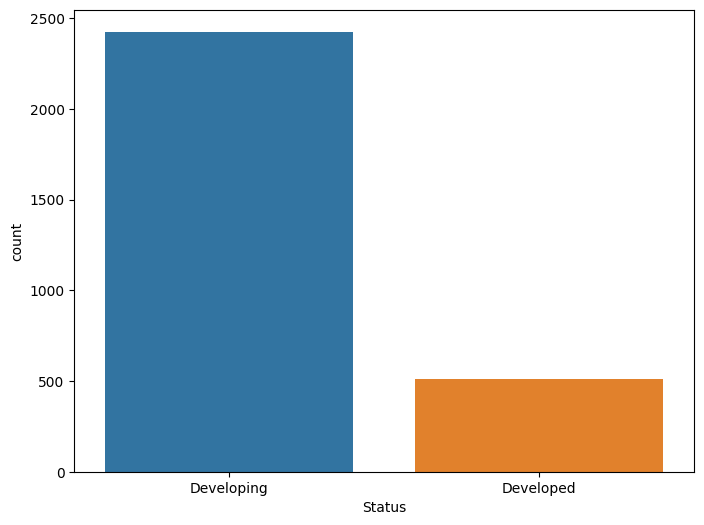

In [325]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')

### Also the data has mostly developing countries than developed

## Checking current life expectancy in Developing and developed nations

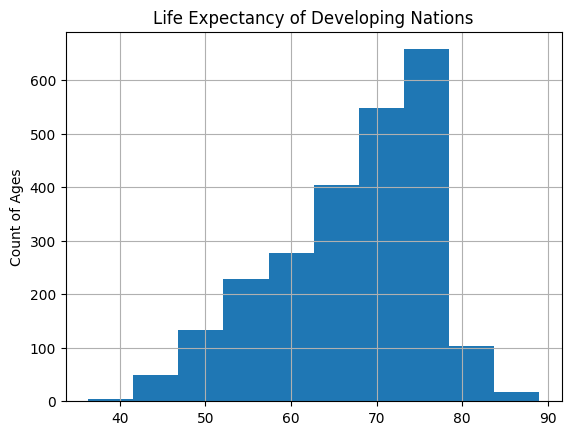

In [326]:
developing_df = df[df['Status'] == 'Developing']
developing_df['Life expectancy '].hist()
plt.xlabel('')
plt.ylabel('Count of Ages')
plt.title("Life Expectancy of Developing Nations")
plt.show()

### We can make inference that range of years for life expectancy lies between 42 - 90 years

<Axes: >

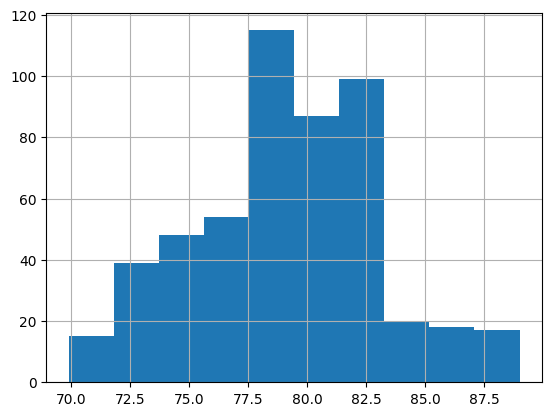

In [327]:
developed_df = df[df['Status'] == 'Developed']
developed_df['Life expectancy '].hist()

### Whereas in developed nations, the range of age is between 70 to 90.

In [328]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [329]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [330]:
df_toplot = df[['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
# df_toplot.head()


In [331]:
def boxplot_df(df):
    fig, ax = plt.subplots(9, 2, figsize=(10, 30))
    ax = ax.flatten()
    for i, column in enumerate(df_toplot):
        row = i // 2
        col = i%2
        sns.boxplot(df[column], ax=ax[i], color = 'C'+str(i))
        ax[i].set_title(column)
    plt.tight_layout()
    plt.show()

In [332]:
def imputer(df, col):
    for i in df[col]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        lower_tail = q1-1.5 * iqr
        upper_tail = q3+1.5 * iqr
        if i > upper_tail or i < lower_tail:
            df[col] = df[col].replace(i, np.mean(df[col]))
#     sns.boxplot(df[col])

In [333]:
def imputer_columns(df):
    for i in df_toplot.columns:
        print(i)
        imputer(df, i)

### Boxplot of all the columns to check the outliers

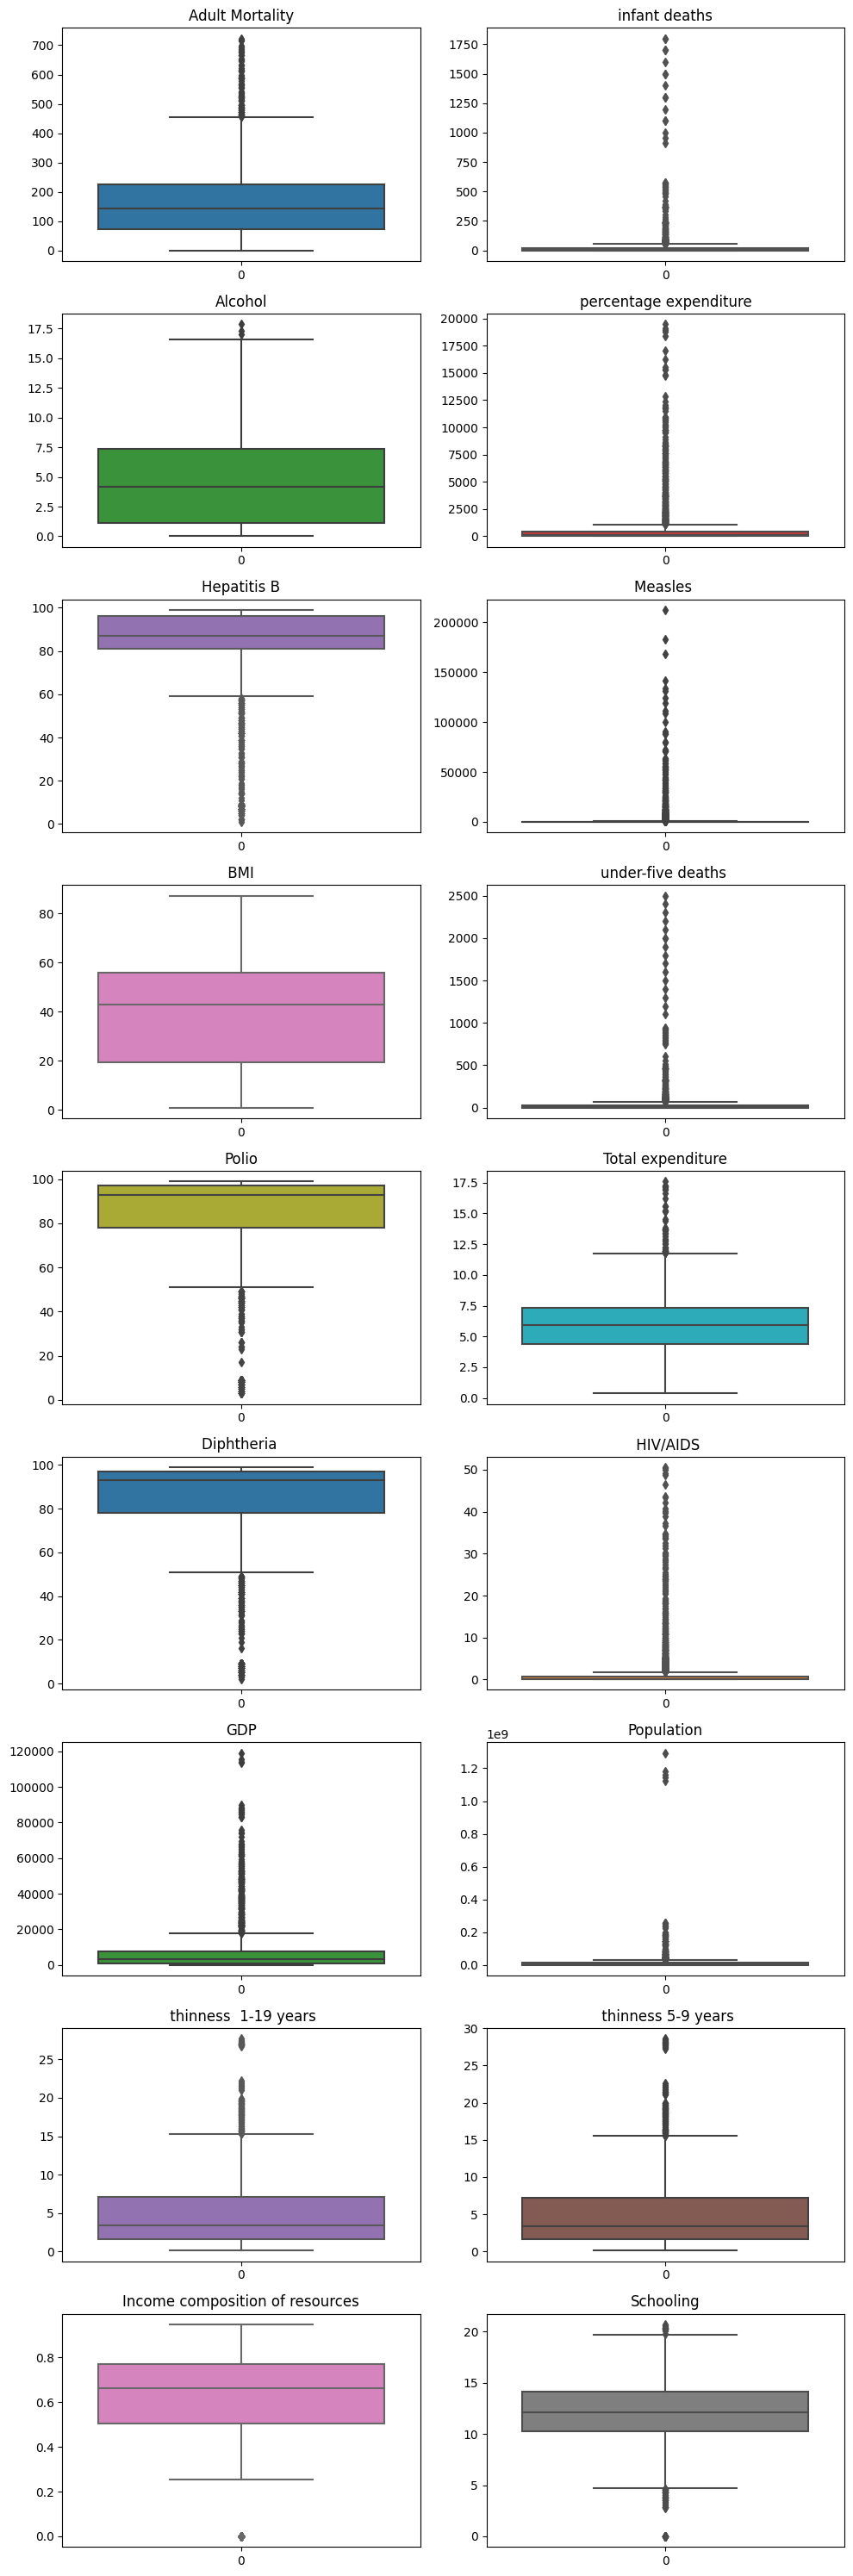

In [334]:
boxplot_df(df)

### There are many outliers in this, thus we will fix this using our imputer function

In [335]:
imputer_columns(df) #On execution step-wise it will print out the names of the columns

Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


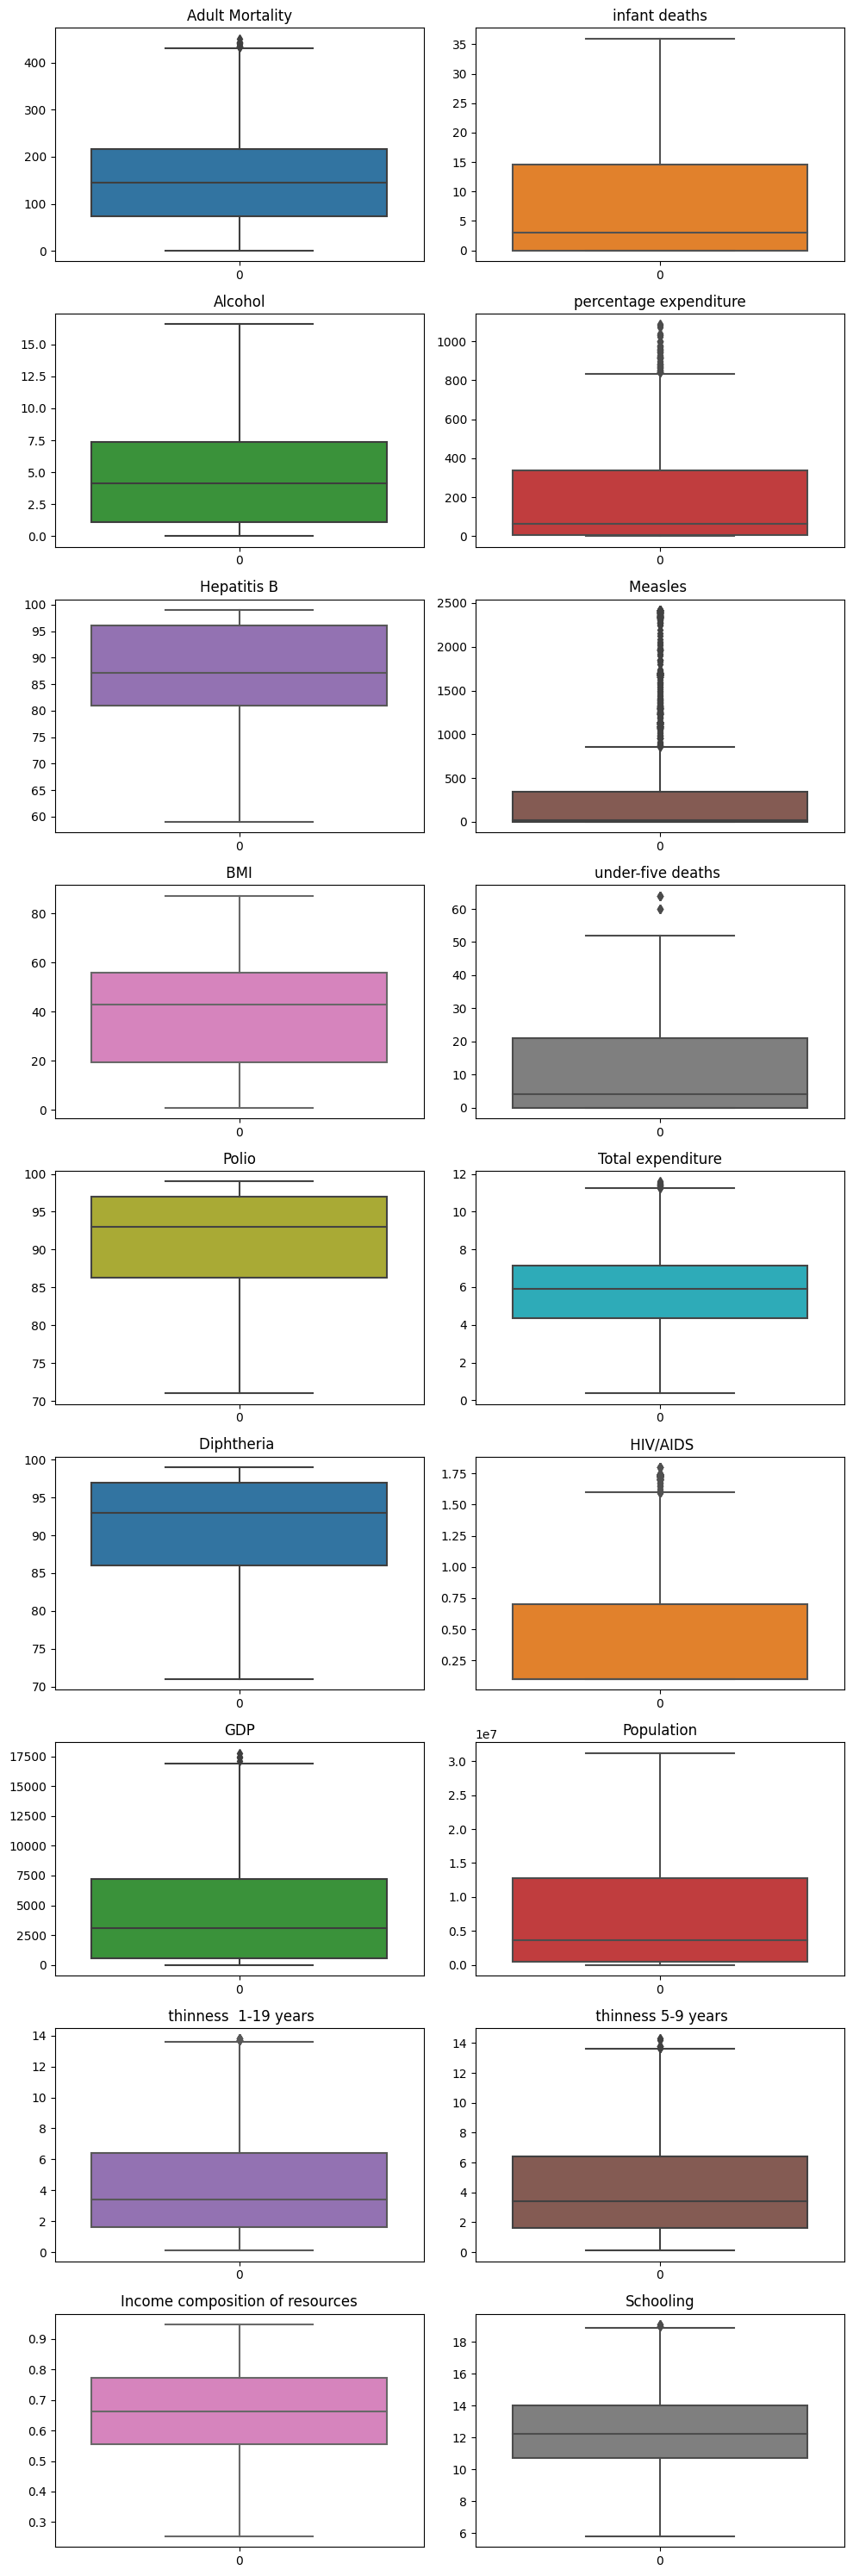

In [336]:
boxplot_df(df)

### Now this is much better

### Comparing BMI and Population

<Axes: xlabel='Population', ylabel=' BMI '>

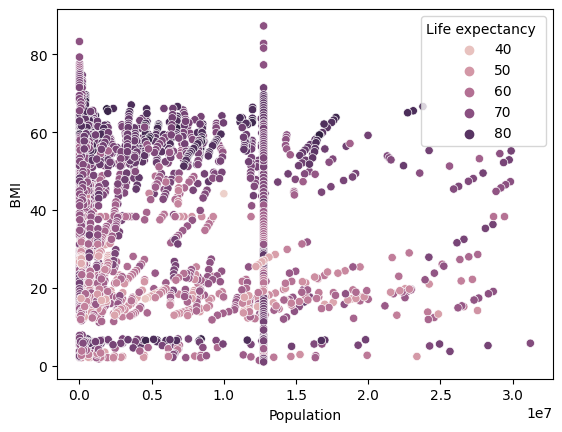

In [337]:
sns.scatterplot(data = df, x='Population', y=' BMI ', hue='Life expectancy ')

## Machine Learning

#### Here we are going to use Artificial Neural Networks

### Importing Libraries

In [353]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#for label encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [339]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.592240,19.1,42.035739,82.550188,8.16,89.625585,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,30.228430,0.01,73.523582,62.0,492.000000,18.6,41.938138,87.524329,8.18,87.798113,0.1,612.696514,3.275820e+05,4.831290,4.861855,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,30.147967,0.01,73.219243,64.0,430.000000,18.1,41.848155,87.859656,8.13,88.992970,0.1,631.744976,1.274623e+07,4.822666,4.853252,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,30.038141,0.01,78.184215,67.0,2420.023006,17.6,41.703714,90.602424,8.52,90.396698,0.1,669.959000,3.696958e+06,4.818283,4.848880,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,29.958573,0.01,7.097109,68.0,2419.898099,17.2,41.529118,90.835395,7.87,90.252790,0.1,63.537231,2.978599e+06,4.809378,4.839927,0.454,9.5


In [340]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

## A step-wise procedure
### a. Converting str features to labels

In [341]:
def encode(df, feature):
    encoder = OneHotEncoder()
    df2 = encoder.fit_transform(df[[feature]]).toarray()
    df2 = pd.DataFrame(df2, columns = encoder.get_feature_names_out([feature]))
    df = pd.concat([df, df2], axis=1)
    df.drop(feature, axis=1, inplace=True)
    return df

In [342]:
df = encode(df, 'Status')

In [345]:
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.592240,19.1,42.035739,82.550188,8.16,89.625585,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1,0.0,1.0
1,Afghanistan,2014,59.9,271.0,30.228430,0.01,73.523582,62.0,492.000000,18.6,41.938138,87.524329,8.18,87.798113,0.1,612.696514,3.275820e+05,4.831290,4.861855,0.476,10.0,0.0,1.0
2,Afghanistan,2013,59.9,268.0,30.147967,0.01,73.219243,64.0,430.000000,18.1,41.848155,87.859656,8.13,88.992970,0.1,631.744976,1.274623e+07,4.822666,4.853252,0.470,9.9,0.0,1.0
3,Afghanistan,2012,59.5,272.0,30.038141,0.01,78.184215,67.0,2420.023006,17.6,41.703714,90.602424,8.52,90.396698,0.1,669.959000,3.696958e+06,4.818283,4.848880,0.463,9.8,0.0,1.0
4,Afghanistan,2011,59.2,275.0,29.958573,0.01,7.097109,68.0,2419.898099,17.2,41.529118,90.835395,7.87,90.252790,0.1,63.537231,2.978599e+06,4.809378,4.839927,0.454,9.5,0.0,1.0


In [347]:
lencoder = LabelEncoder()
df['Country'] = lencoder.fit_transform(df['Country'])

In [348]:
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,0,2015,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.592240,19.1,42.035739,82.550188,8.16,89.625585,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1,0.0,1.0
1,0,2014,59.9,271.0,30.228430,0.01,73.523582,62.0,492.000000,18.6,41.938138,87.524329,8.18,87.798113,0.1,612.696514,3.275820e+05,4.831290,4.861855,0.476,10.0,0.0,1.0
2,0,2013,59.9,268.0,30.147967,0.01,73.219243,64.0,430.000000,18.1,41.848155,87.859656,8.13,88.992970,0.1,631.744976,1.274623e+07,4.822666,4.853252,0.470,9.9,0.0,1.0
3,0,2012,59.5,272.0,30.038141,0.01,78.184215,67.0,2420.023006,17.6,41.703714,90.602424,8.52,90.396698,0.1,669.959000,3.696958e+06,4.818283,4.848880,0.463,9.8,0.0,1.0
4,0,2011,59.2,275.0,29.958573,0.01,7.097109,68.0,2419.898099,17.2,41.529118,90.835395,7.87,90.252790,0.1,63.537231,2.978599e+06,4.809378,4.839927,0.454,9.5,0.0,1.0


In [350]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [352]:
scaler = StandardScaler()

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [355]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [357]:
X_train.shape

(2056, 22)

In [361]:
model = Sequential()
model.add(Dense(units=22, activation='relu'))
model.add(Dense(units=22, activation='relu'))
model.add(Dense(units=22, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [365]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

In [367]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=600, callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 1s 12ms/step - loss: 4764.3643 - val_loss: 4593.0063
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 4565.5576 - val_loss: 4337.6943
Epoch 3/600
17/17 [==============================] - 0s 4ms/step - loss: 4236.7666 - val_loss: 3906.6270
Epoch 4/600
17/17 [==============================] - 0s 4ms/step - loss: 3686.1765 - val_loss: 3196.2600
Epoch 5/600
17/17 [==============================] - 0s 4ms/step - loss: 2825.3140 - val_loss: 2166.0574
Epoch 6/600
17/17 [==============================] - 0s 4ms/step - loss: 1741.7013 - val_loss: 1147.7646
Epoch 7/600
17/17 [==============================] - 0s 4ms/step - loss: 942.8791 - val_loss: 704.1604
Epoch 8/600
17/17 [==============================] - 0s 4ms/step - loss: 660.5119 - val_loss: 542.4424
Epoch 9/600
17/17 [==============================] - 0s 4ms/step - loss: 497.9157 - val_loss: 411.0688
Epoch 10/600
17/17 [==============================] - 0s 4ms

<Axes: >

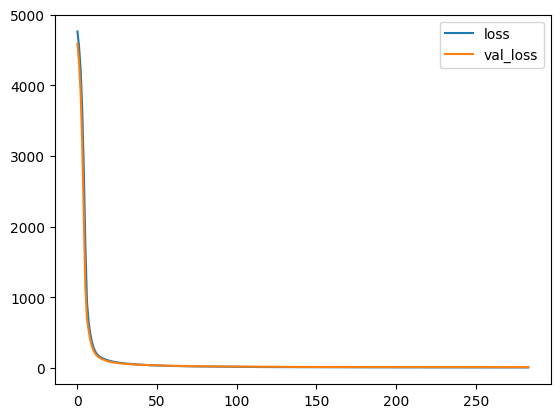

In [368]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [369]:
y_pred = model.predict(X_test)

28/28 [==============================] - 0s 1ms/step


In [373]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8479384721538952

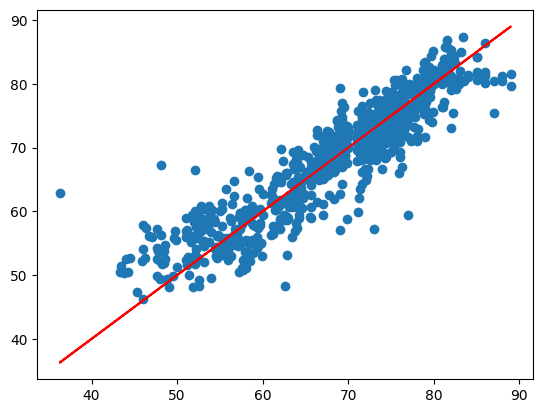

In [378]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

In [379]:
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.